In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Function to preprocess the data
def preprocess_data(df):
    # Create label encoders for categorical variables
    le = LabelEncoder()
    categorical_cols = ['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 
                       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 
                       'Sex', 'Age_Category', 'Smoking_History', 'Alcohol_Consumption',
                       'Fruit_Consumption', 'Green_Vegetables_Consumption', 
                       'FriedPotato_Consumption']
    
    # Apply label encoding to categorical columns
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])
    
    # Standardize all features - normalization 
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df)
    
    return scaled_features

# Function to perform and visualize k-means clustering
def kmeans_analysis(X, n_clusters=3):
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    
    # Reduce dimensionality for visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    # Create visualization
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
    plt.title('K-Means Clustering Results (PCA Visualization)')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.colorbar(scatter, label='Cluster Label')
    plt.show()
    
    return cluster_labels


# Function to analyze clusters in relation to heart disease - acrescentar + colunas ??
def analyze_clusters(df, cluster_labels, algorithm_name):
    # Add cluster labels to DataFrame
    df_with_clusters = df.copy()
    df_with_clusters['Cluster'] = cluster_labels

    # Map 'Yes'/'No' to 1/0 if necessary
    for col in ['Heart_Disease', 'Exercise']:
        if df_with_clusters[col].dtype == object:
            df_with_clusters[col] = df_with_clusters[col].map({'Yes': 1, 'No': 0})

    # Convert 'Age_Category' to numeric midpoints if necessary 
    if 'Age_Category' in df_with_clusters.columns: 
        age_mapping = {
            "18-24": 21,
            "25-29": 27,
            "30-34": 32,
            "35-39": 37,
            "40-44": 42,
            "45-49": 47,
            "50-54": 52,
            "55-59": 57,
            "60-64": 62,
            "65-69": 67,
            "70-74": 72,
            "75-79": 77,
            "80+": 85
        }
        if df_with_clusters['Age_Category'].dtype == object:
            df_with_clusters['Age_Category'] = df_with_clusters['Age_Category'].map(age_mapping)

    # Ensure relevant columns are numeric
    numeric_cols = ['Heart_Disease', 'Age_Category', 'BMI', 'Exercise']
    for col in numeric_cols:
        if col in df_with_clusters.columns:
            df_with_clusters[col] = pd.to_numeric(df_with_clusters[col], errors='coerce')

    # Check column names and data types
    print("Column names:", df_with_clusters.columns.tolist())
    print("Column types:", df_with_clusters[numeric_cols].dtypes)

    # Aggregate statistics by cluster
    try:
        cluster_analysis = df_with_clusters.groupby('Cluster').agg({
            'Heart_Disease': ['count', 'mean'],
            'Age_Category': 'mean',
            'BMI': 'mean',
            'Exercise': 'mean'
        }).round(2)

        print(f"\n{algorithm_name} Clustering Analysis:")
        print("================================")
        print("\nCluster Statistics:")
        print(cluster_analysis)
        
        # Visualize heart disease distribution in clusters - 3 

        # plt.figure(figsize=(10, 6))
        # for cluster in df_with_clusters['Cluster'].unique():
        #     cluster_data = df_with_clusters[df_with_clusters['Cluster'] == cluster]
        #     plt.hist(cluster_data['Heart_Disease'], alpha=0.5, 
        #              label=f'Cluster {cluster}', bins=20)
        
        # plt.title(f'Heart Disease Distribution by {algorithm_name} Cluster')
        # plt.xlabel('Heart Disease')
        # plt.ylabel('Count')
        # plt.legend()
        # plt.show()

        # cluster_counts = df_with_clusters.groupby(['Cluster', 'Heart_Disease'])['Heart_Disease'].count().unstack()

        # # Plot stacked bar chart
        # cluster_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'orange'], alpha=0.7)

        # plt.title(f'Heart Disease Distribution by {algorithm_name} Cluster')
        # plt.xlabel('Cluster')
        # plt.ylabel('Count')
        # plt.legend(['No Heart Disease', 'Heart Disease'], title='Heart Disease')
        # plt.show()
        # Visualize heart disease distribution by clusters
        
        plt.figure(figsize=(10, 6))
        for cluster in df_with_clusters['Cluster'].unique():
            cluster_data = df_with_clusters[df_with_clusters['Cluster'] == cluster]
            plt.hist(cluster_data['Heart_Disease'], alpha=0.5, 
                     label=f'Cluster {cluster}', bins=20)
        
        plt.title(f'Heart Disease Distribution by {algorithm_name} Cluster')
        plt.xlabel('Heart Disease')
        plt.ylabel('Count')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Visualize key feature distributions for each cluster
        for feature in ['Age_Category', 'BMI', 'Exercise']:
            plt.figure(figsize=(10, 6))
            sns.boxplot(x='Cluster', y=feature, data=df_with_clusters)
            plt.title(f'{feature} by {algorithm_name} Cluster')
            plt.grid(True)
            plt.show()


        return cluster_analysis

    except Exception as e:
        print(f"Error in analyze_clusters: {str(e)}")
        print("Column names in dataframe:", df_with_clusters.columns.tolist())
        return None



In [ ]:
# Function to perform and visualize DBSCAN clustering
def dbscan_analysis(X, eps=0.5, min_samples=5):
    # Perform DBSCAN clustering
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = dbscan.fit_predict(X)
    
    # Reduce dimensionality for visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    # Create visualization
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
    plt.title('DBSCAN Clustering Results (PCA Visualization)')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.colorbar(scatter, label='Cluster Label')
    plt.show()
    
    return cluster_labels



Performing k-means clustering...


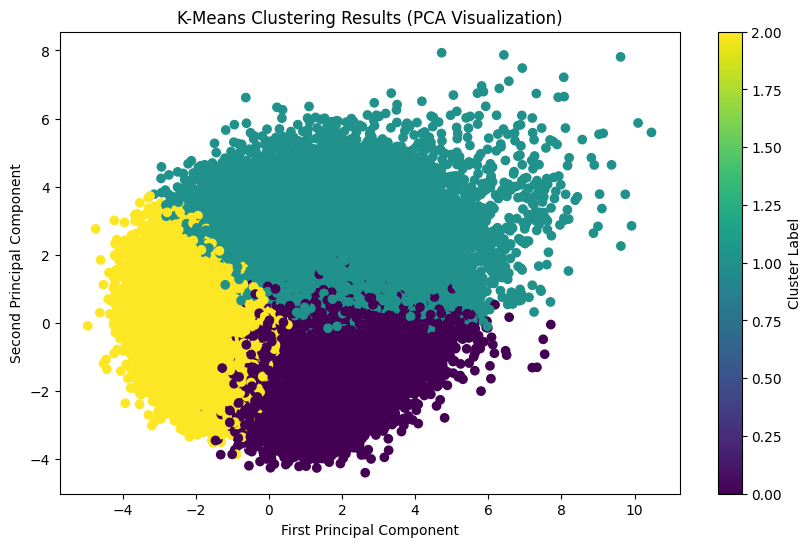

Column names: ['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption', 'Cluster']
Column types: Heart_Disease      int64
Age_Category       int64
BMI              float64
Exercise           int64
dtype: object

K-Means Clustering Analysis:

Cluster Statistics:
        Heart_Disease       Age_Category    BMI Exercise
                count  mean         mean   mean     mean
Cluster                                                 
0              121508  0.07        50.78  27.66     0.87
1               63291  0.17        61.27  35.71     0.49
2              124055  0.05        55.53  25.95     0.83


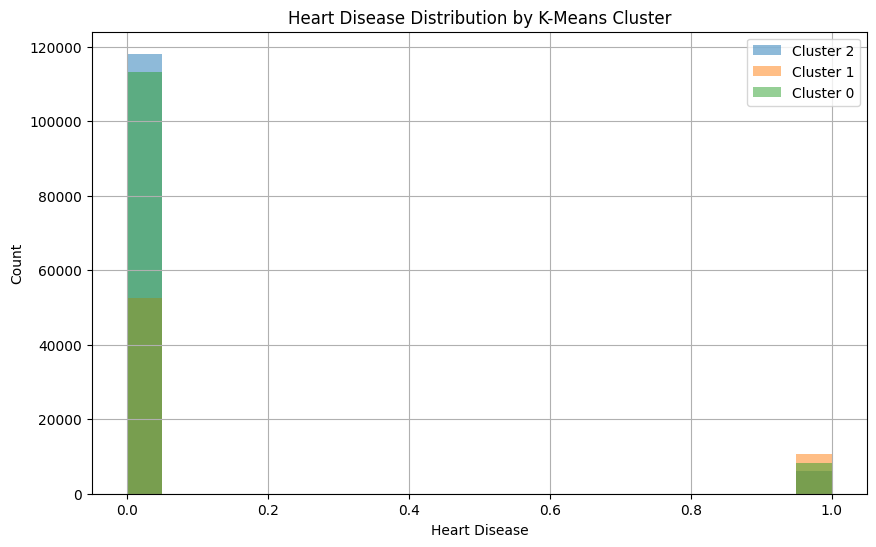

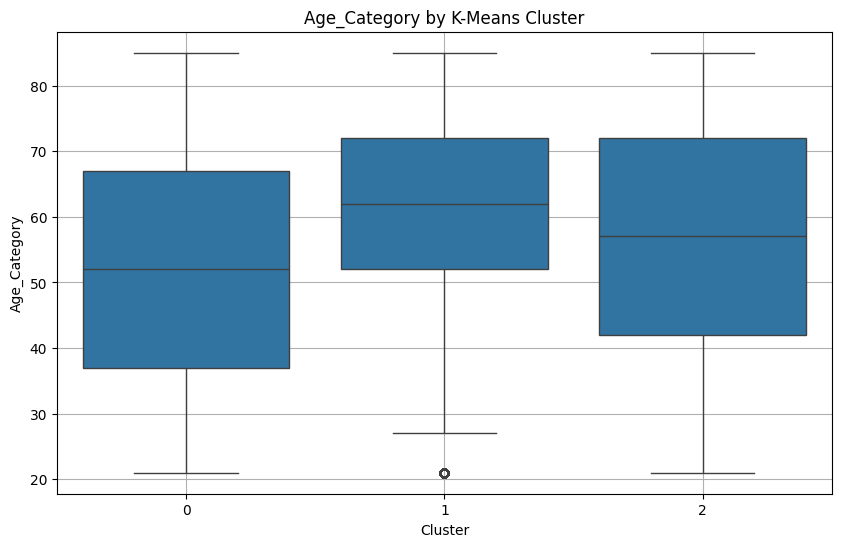

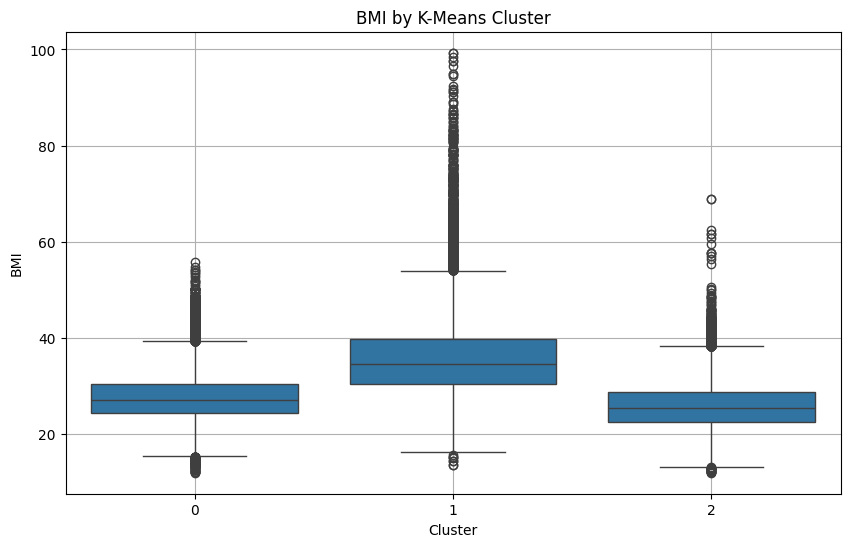

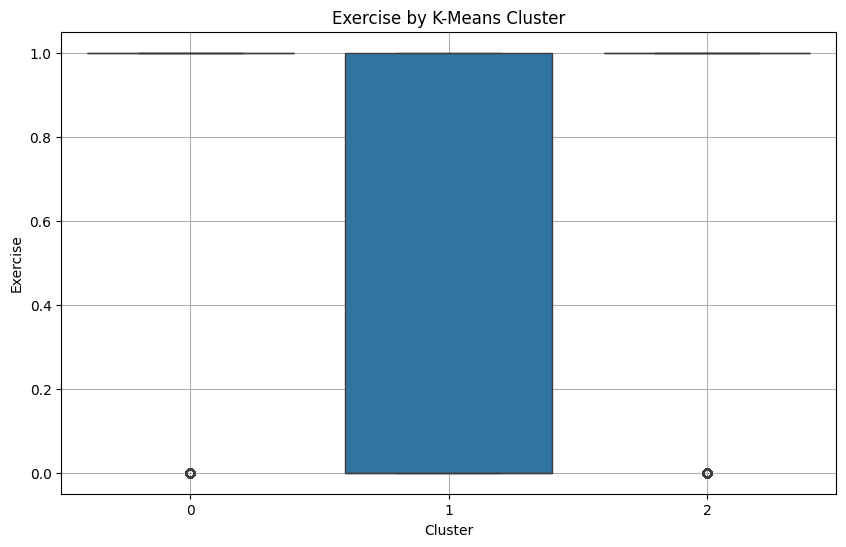

In [35]:
# Main execution
def main():
    # Load your dataset here
    file_path = "../CVD_cleaned.csv" 

    # For demonstration, I'll create a sample dataframe
    # Replace this with your actual data loading
    df = pd.read_csv(file_path)
    
    # Remove the target variable for clustering
    X = df.drop('Heart_Disease', axis=1)
    
    # Preprocess the data
    X_scaled = preprocess_data(X)
    
    # Perform k-means clustering
    print("\nPerforming k-means clustering...")
    kmeans_labels = kmeans_analysis(X_scaled)
    analyze_clusters(df, kmeans_labels, "K-Means")
    
    # Perform DBSCAN clustering
    # print("\nPerforming DBSCAN clustering...")
    # dbscan_labels = dbscan_analysis(X_scaled)
    # analyze_clusters(df, dbscan_labels, "DBSCAN")

if __name__ == "__main__":
    main()

**Data Preprocessing:**

Converts categorical variables using LabelEncoder
Standardizes all features to ensure equal weighting
Handles the mix of numerical and categorical data appropriately


**K-Means Analysis:**

Groups patients into distinct clusters based on all features
Can identify natural groupings of patients with similar characteristics
Useful for finding patterns that might correlate with heart disease
The implementation uses 3 clusters by default but can be adjusted


**DBSCAN Analysis:**

Identifies clusters of varying shapes and sizes
Can detect outliers (labeled as -1)
Better at handling non-spherical clusters
Parameters (eps and min_samples) can be tuned based on your data


**Visualization and Analysis:**

Uses PCA to create 2D visualizations of the clusters
Provides detailed statistics for each cluster
Shows the distribution of heart disease within each cluster
Includes relevant metrics like mean age, BMI, and exercise levels

To use this script:

Replace the data loading section with your actual dataset
Adjust the preprocessing if needed for your specific column names
Tune the clustering parameters (n_clusters for k-means, eps and min_samples for DBSCAN)
Run the analysis to get insights about patient groups

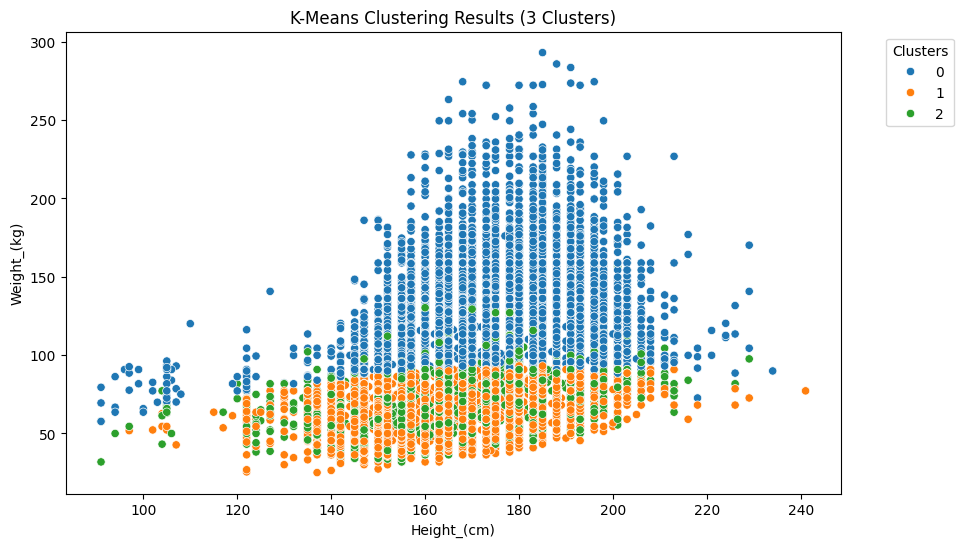

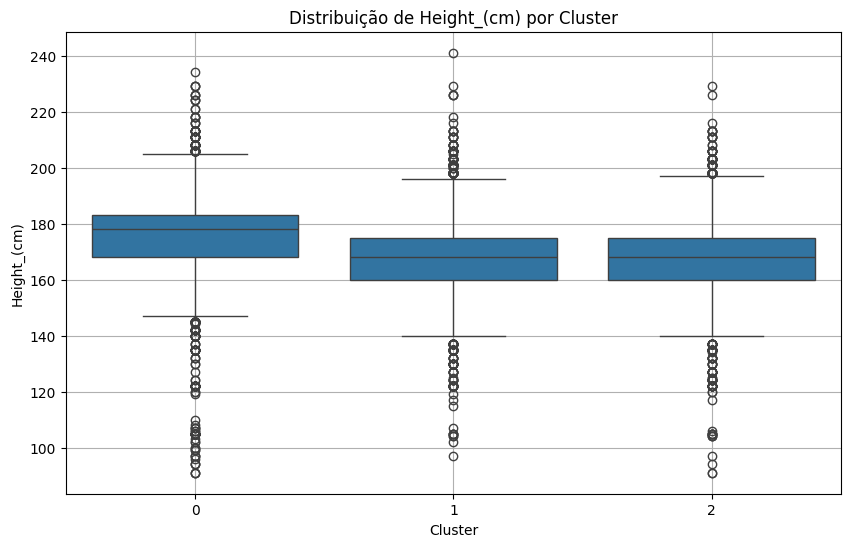

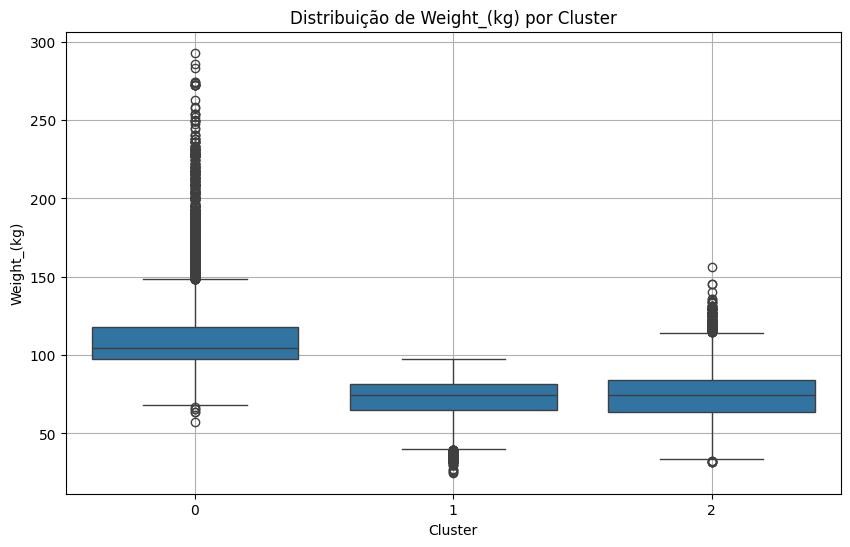

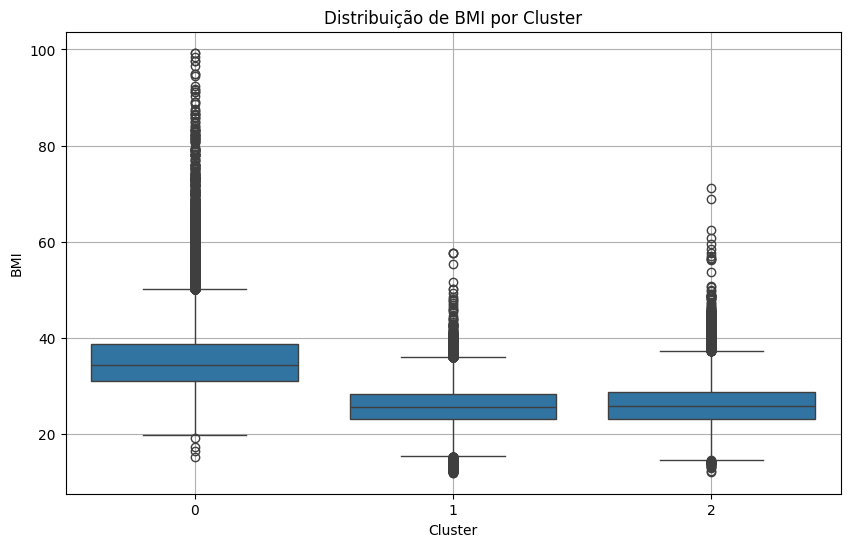

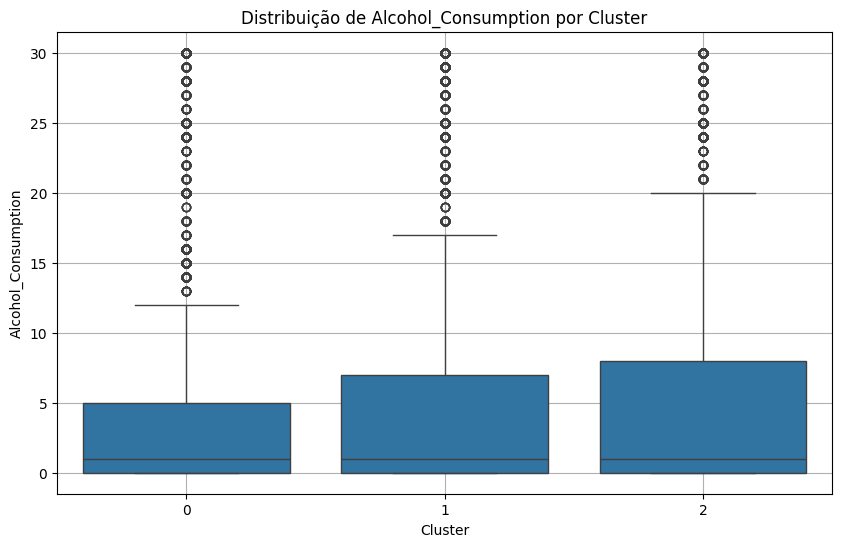

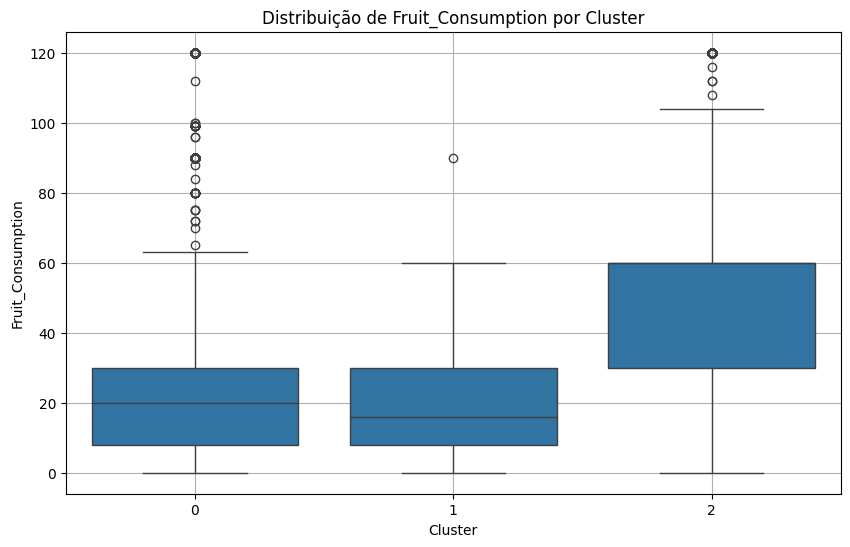

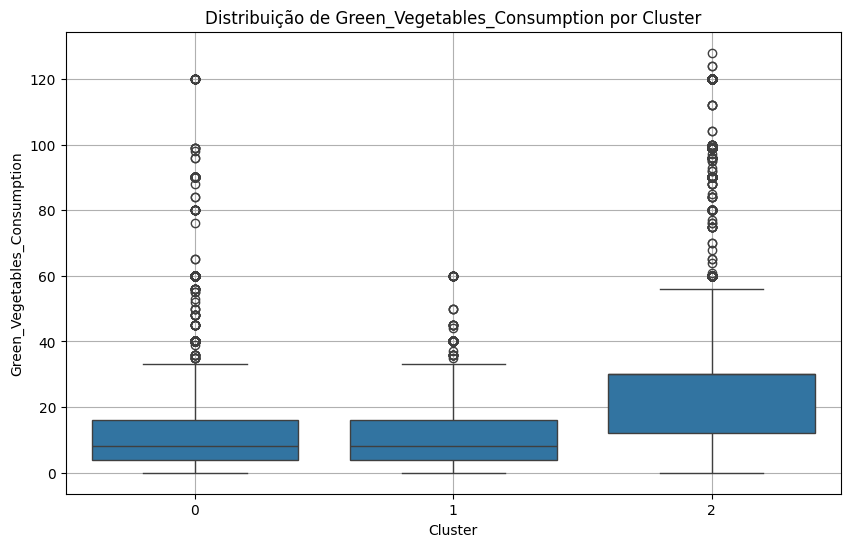

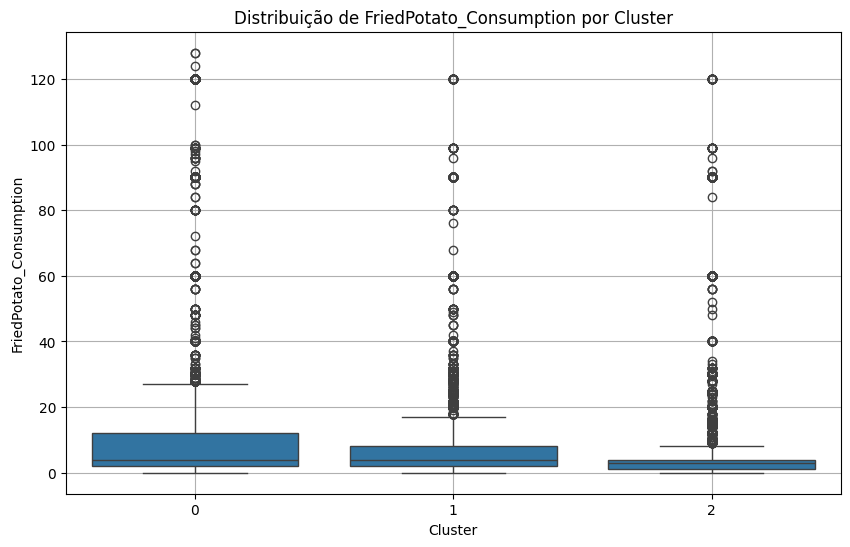

Centroides dos clusters:
[[ 0.51496903  1.2309928   1.08538597 -0.09332104 -0.2650038  -0.20260376
   0.22957266]
 [-0.1977171  -0.48783607 -0.43231826  0.03687302 -0.50148517 -0.32784406
  -0.02627314]
 [-0.19157659 -0.43051321 -0.37564808  0.03283478  1.18675514  0.80709199
  -0.19701021]]


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Função para preprocessar os dados
def preprocess_data(df):
    # Selecionar apenas colunas numéricas
    numerical_cols = [
        "Height_(cm)", "Weight_(kg)", "BMI",
        "Alcohol_Consumption", "Fruit_Consumption",
        "Green_Vegetables_Consumption", "FriedPotato_Consumption"
    ]
    
    # Remover colunas não numéricas e NaNs
    df = df[numerical_cols].dropna()

    # Normalizar os dados
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df)

    return scaled_features, df

# Função para executar o K-Means e gerar gráficos
def kmeans_analysis(data, n_clusters):
    # Aplicar K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data)

    # Retornar rótulos e modelo
    return cluster_labels, kmeans

# Função para visualizar os clusters
def visualize_clusters(data_original, cluster_labels, n_clusters):
    data_original['Cluster'] = cluster_labels

    # Gráfico de dispersão para as duas primeiras variáveis
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x=data_original.iloc[:, 0],
        y=data_original.iloc[:, 1],
        hue=data_original['Cluster'],
        palette='tab10',
        legend="full"
    )
    plt.title(f"K-Means Clustering Results ({n_clusters} Clusters)")
    plt.xlabel(data_original.columns[0])
    plt.ylabel(data_original.columns[1])
    plt.legend(title="Clusters", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.show()

    # Boxplot para variáveis principais por cluster
    for col in data_original.columns[:-1]:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Cluster', y=col, data=data_original)
        plt.title(f"Distribuição de {col} por Cluster")
        plt.grid(True)
        plt.show()

# Execução principal
def main():
    # Carregar o dataset
    file_path = '../CVD_cleaned.csv'
    df = pd.read_csv(file_path)

    # Preprocessar os dados
    scaled_data, original_data = preprocess_data(df)

    # Número de clusters desejados
    n_clusters = 3

    # Realizar K-Means
    cluster_labels, kmeans_model = kmeans_analysis(scaled_data, n_clusters)

    # Visualizar os resultados
    visualize_clusters(original_data, cluster_labels, n_clusters)

    # Análise dos clusters
    cluster_centers = kmeans_model.cluster_centers_
    print("Centroides dos clusters:")
    print(cluster_centers)

if __name__ == "__main__":
    main()


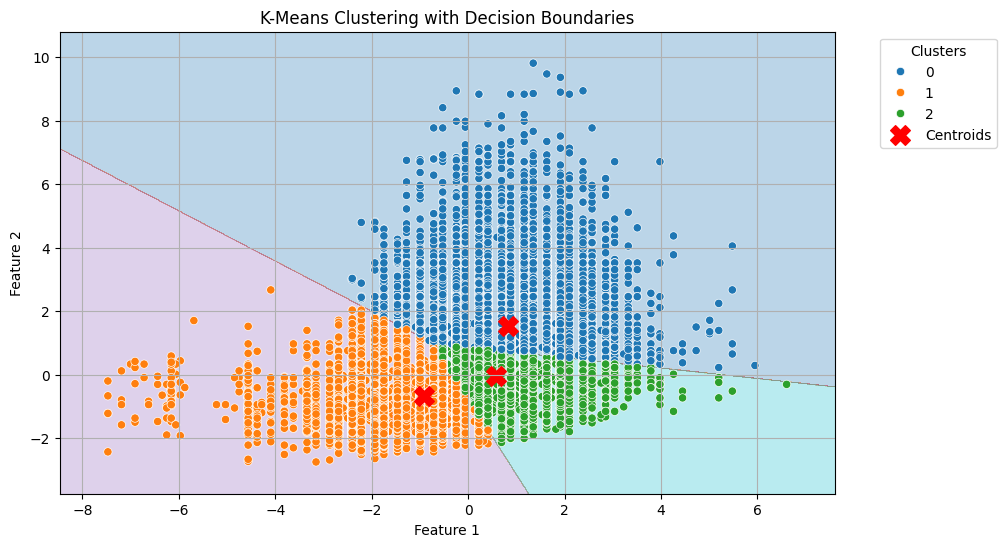

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Função para preprocessar os dados
def preprocess_data(df):
    # Selecionar apenas colunas numéricas
    numerical_cols = [
        "Height_(cm)", "Weight_(kg)", "BMI",
        "Alcohol_Consumption", "Fruit_Consumption",
        "Green_Vegetables_Consumption", "FriedPotato_Consumption"
    ]
    
    # Remover colunas não numéricas e NaNs
    df = df[numerical_cols].dropna()

    # Normalizar os dados
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df)

    return scaled_features, df

# Função para executar o K-Means e gerar o gráfico típico
def kmeans_analysis(data, n_clusters):
    # Aplicar K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data)

    # Obter centróides
    centroids = kmeans.cluster_centers_

    return cluster_labels, centroids, kmeans

# Função para visualizar os clusters com fronteiras de decisão
def visualize_clusters_with_boundaries(data, cluster_labels, kmeans_model):
    # Usar as duas primeiras variáveis para visualização
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

    # Criar uma grade de pontos
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.01),
        np.arange(y_min, y_max, 0.01)
    )

    # Prever os clusters para cada ponto da grade
    Z = kmeans_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plotar as fronteiras de decisão
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='tab10')

    # Plotar os pontos de dados e os centróides
    sns.scatterplot(
        x=data[:, 0],
        y=data[:, 1],
        hue=cluster_labels,
        palette='tab10',
        legend="full"
    )

    plt.scatter(
        kmeans_model.cluster_centers_[:, 0],
        kmeans_model.cluster_centers_[:, 1],
        s=200, c='red', marker='X', label='Centroids'
    )

    plt.title("K-Means Clustering with Decision Boundaries")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend(title="Clusters", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid(True)
    plt.show()

# Execução principal
def main():
    # Carregar o dataset
    file_path = '../CVD_cleaned.csv'
    df = pd.read_csv(file_path)

    # Preprocessar os dados
    scaled_data, original_data = preprocess_data(df)

    # Selecionar as duas primeiras variáveis para visualização
    scaled_data = scaled_data[:, :2]

    # Número de clusters desejados
    n_clusters = 3

    # Realizar K-Means
    cluster_labels, centroids, kmeans_model = kmeans_analysis(scaled_data, n_clusters)

    # Visualizar os resultados com fronteiras de decisão
    visualize_clusters_with_boundaries(scaled_data, cluster_labels, kmeans_model)

if __name__ == "__main__":
    main()
